In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import pylab as pl
import subprocess
import concurrent.futures
import shutil

# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)


In [2]:

os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')


ERROR: (gcloud.compute.instances.delete) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-05' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-06' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-07' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/inst

0

In [3]:
config_list = [ 'join']



# config_list = ['cre_setup_2_scale_1_node_info']

# config_list2 = ['global_12cls',\
#                 'local_12cls',\
#                'global_3cls',\
#                'global_4cls',\
#                'global_6cls',\
#                'global_8cls',\
#                'global_2cls',\
#                'local_3cls',\
#                'local_4cls',\
#                'local_6cls',\
#                'local_8cls',\
#                'local_2cls']
# config_list2 = ['local_2cls']


config_list = config_list

In [7]:
for cfig in config_list:    
    if 2>1:
        os.remove('node_info.csv')

        os.system('cp node_setup/'+cfig+'.csv node_info.csv')


        df =pd.read_csv('node_info.csv')

        node_info_dict = df.to_dict()

        node_info_dict

        total_count = 0

        for key in node_info_dict['ServerOrClientregion'].keys():
            if node_info_dict['ServerOrClientregion'][key] ==0:
                total_count = total_count + 1

        total_count

        replica_count = 0

        for key in node_info_dict['cluster_id'].keys():
            if node_info_dict['cluster_id'][key] ==0:
                replica_count = replica_count + 1


        
        cluster_count = 0
        
        for key in node_info_dict['cluster_id']:
            print(key, node_info_dict['cluster_id'][key])
            if node_info_dict['cluster_id'][key] > cluster_count:
                cluster_count = node_info_dict['cluster_id'][key]
                
        cluster_count = cluster_count + 1
        
        n_clusters = cluster_count

        nclients = 0

        for i in node_info_dict['ServerOrClientregion']:
        #     print(node_info_dict['ServerOrClientregion'][i])
            if node_info_dict['ServerOrClientregion'][i] == 1:
                nclients = nclients + 1
        nclients

        clusters_tracked = []
        cluster_regions_tracked = []

        for key in node_info_dict['region']:
            if int(node_info_dict['cluster_id'][key]) not in clusters_tracked and int(node_info_dict['cluster_id'][key]) >=0:
                clusters_tracked.append(int(node_info_dict['cluster_id'][key]))
                cluster_regions_tracked.append(node_info_dict['region'][key].strip().replace('"', '')[1:-1])


        cluster_regions_tracked     

        cluster_regions_tracked, clusters_tracked


        regions = cluster_regions_tracked



        n_regions = len(regions)

        for i,k in enumerate(regions):
            print(i,k)

        for item, idx in enumerate(node_info_dict['region'].keys()):
            print(item, idx, node_info_dict['region'][item])

        lines  = []


        for idx, key in enumerate( node_info_dict['region'].keys()):

            line = 'gcloud compute instances create resdb-'+f"{idx:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+node_info_dict['region'][key].strip()[1:-1]+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'
            lines.append(line)

        with open('launch_cloud_instances.sh', 'w') as f:
            for item in lines:
                f.write(str(item) + '\n')


        len(lines), node_info_dict['region'][key].strip()[1:-1]


        def run_command(command):
            subprocess.call(command, shell=True)

        commands = lines

        # Create a ThreadPoolExecutor or ProcessPoolExecutor, depending on your needs
        with concurrent.futures.ThreadPoolExecutor(max_workers=len(commands)) as executor:
            # Submit each command to the executor for parallel execution
            futures = [executor.submit(run_command, command) for command in commands]

            # Wait for all tasks to complete
            concurrent.futures.wait(futures)

    #     time.sleep(30)

        # os.system('sh launch_cloud_instances.sh')

        for folder in os.listdir('.'):
            if 'config' in folder and folder!='config' and 'zip' not in folder and '.' not in folder:
                shutil.rmtree(folder)


        instance_type = 'e2-small'


        redirect = '>'

        os.system('gcloud compute instances list  --format="value(networkInterfaces[0].networkIP)" '+\
                  redirect+' all_internal_ips')



        os.system('gcloud compute instances list --format="value(networkInterfaces[0].networkIP)" '+\
              redirect+' all_external_ips')

        with open('all_internal_ips') as f:
            ipList = f.read().splitlines()
        ipList = [x for x in ipList if x!='None']

        ipList, len(ipList)

        new_server_only_ips= []
        new_client_only_ips= []



        for i in range(total_count + nclients):
            if node_info_dict['ServerOrClientregion'][i] ==0:
                new_server_only_ips = new_server_only_ips + [ipList[i]]
            else:
                new_client_only_ips = new_client_only_ips + [ipList[i]]



        # new_server_only_ips= []
        # new_client_only_ips= []


        # current_region_total = 0
        # for i in range(n_regions):
        #     print(current_region_total,current_region_total+ clusters_per_region_map[i] *replica_count)
        #     new_server_only_ips = new_server_only_ips + ipList[current_region_total:current_region_total+ clusters_per_region_map[i] *replica_count]

        #     new_client_only_ips = new_client_only_ips + ipList[current_region_total+ clusters_per_region_map[i] *replica_count:
        #                                                       current_region_total+ clusters_per_region_map[i] *(replica_count+1)]


        #     current_region_total = current_region_total + clusters_per_region_map[i] *replica_count +  clusters_per_region_map[i]

        new_server_only_ips, len(new_server_only_ips)

        new_client_only_ips, len(new_client_only_ips) 

        # ipList = new_server_only_ips + new_client_only_ips

        # ipList, len(ipList)

        nclients = 0
        nservers = 0
        count = 0

        clusterIpMap = {}


        for i in node_info_dict['ServerOrClientregion']:
        #     print(node_info_dict['ServerOrClientregion'][i])

            if node_info_dict['ServerOrClientregion'][i] == 0:
                clusterIpMap[nservers] = ipList[count]
                nservers = nservers + 1

            count = count + 1

        nclients = 0
        nservers = 0
        count = 0

        for i in node_info_dict['ServerOrClientregion']:
        #     print(node_info_dict['ServerOrClientregion'][i])

            if node_info_dict['ServerOrClientregion'][i] == 1:
                print('test: ', 7001+nclients, ipList[count])
                clusterIpMap[7001+nclients] = ipList[count]
                nclients = nclients + 1

            count = count + 1

        clusterIpMap

        # clusterIpMap = {}

        # for i in range(len(ipList)):
        #     clusterIpMap[i] = ipList[i]


        # for i in range(nclients):

        #     clusterIpMap[7001+i] = ipList[-(nclients-i)]

        clusterPortMap1 = {}
        clusterPortMap2 = {}

        for i in range(len(ipList) - nclients):

            clusterPortMap1[i] = str(10000)

        for i in range(len(ipList) - nclients):
            clusterPortMap2[i] = str(20000)

        # clusterPortMap1[7003] = '11400'
        # clusterPortMap2[7003] = '11410'



        temp = 11900

        for i in range(nclients):

            clusterPortMap1[7001+i] = str(10000)
            clusterPortMap2[7001+i] = str(20000)

        clusterPortMap1, clusterPortMap2

        os.system('echo 3108 | sudo -S ./gradlew installDist')

        for i in range(total_count):
            os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(i)+' 1024')



        os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(7002)+' 1024')
        os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(7001)+' 1024')

        os.system('echo 3108 | sudo -S ./gradlew clean')

        for key in clusterPortMap1.keys():
            if key>7002:
        #         print(key)
                print()

                for folder in os.listdir('config/'):
                    if os.path.isdir('config/'+folder) and 'keys' in folder:
                        if os.path.exists('config/'+folder+'/'+'privatekey7001'):
                            shutil.copy('config/'+folder+'/'+'privatekey7001','config/'+folder+'/'+'privatekey'+str(key))
                            shutil.copy('config/'+folder+'/'+'publickey7001','config/'+folder+'/'+'publickey'+str(key))

                print('----------')
                print()

        for i in range(n_clusters):

            if os.path.exists('config'+str(i)):
                shutil.rmtree('config'+str(i))

            os.mkdir('config'+str(i))
            os.mkdir('config'+str(i)+'/keysRSA')
            os.mkdir('config'+str(i)+'/keysSunEC')
            os.mkdir('config'+str(i)+'/keysECDSA')

        #     print('config'+str(i)+'/keysECDSA')


            shutil.copytree('config/workloads/', 'config'+str(i)+'/workloads')
            shutil.copytree('config/keysSSL_TLS/', 'config'+str(i)+'/keysSSL_TLS')
        #     print('config/workloads/', 'config'+str(i)+'/workloads')


            for file in os.listdir('config/keys/'):

                shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysRSA/'+file)
                shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysSunEC/'+file)
                shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysECDSA/'+file)


            shutil.copy('config/system.config', 'config'+str(i)+'/system.config')    
            shutil.copy('config/logback.xml', 'config'+str(i)+'/logback.xml')





        clusterIpMap, clusterPortMap1

        def find_key_by_value(dictionary, value):
            for key, val in dictionary.items():
                if val == value:
                    return key
            # If the value is not found, you might want to handle this case accordingly.
            return None


        node_info_dict

        find_key_by_value(node_info_dict['ServerID'], 4)

        for n_cluster in range(n_clusters):

            with open('config'+str(n_cluster)+'/hosts.config','w') as file:

                for key in clusterIpMap:
                    if key < 7000:
                        file.writelines(str(key)+' '+clusterIpMap[key]+' '  +clusterPortMap1[key]+' ' +  clusterPortMap2[key]+' '+str(node_info_dict['cluster_id'][find_key_by_value(node_info_dict['ServerID'], key)] )+'\n')
                        print('test: ',str(key)+' '+clusterIpMap[key]+' '  +clusterPortMap1[key]+' ' +  clusterPortMap2[key]+' '+str(node_info_dict['cluster_id'][find_key_by_value(node_info_dict['ServerID'], key)] )+'\n')
                for key in clusterIpMap:
                    if key >= 7000:
                        file.writelines(str(key)+' '+clusterIpMap[key]+' '+clusterPortMap1[key]+'\n')
                        print('test: ', str(key)+' '+clusterIpMap[key]+' '+clusterPortMap1[key]+'\n')

                file.close()


        # for n_cluster in range(n_clusters):

        #     with open('config'+str(n_cluster)+'/hosts.config','w') as file:

        #         for n_cluster1 in range(n_clusters):

        #             for i_replica in range(replica_count):
        #     #             file.writelines(str(i_replica)+' '+clusterIpMap[n_cluster*replica_count+i_replica]+' '  +clusterPortMap1[n_cluster*replica_count+i_replica]+' ' +  clusterPortMap2[n_cluster*replica_count+i_replica]+'\n')
        #                 file.writelines(str(n_cluster1*replica_count+i_replica)+' '+clusterIpMap[n_cluster1*replica_count+i_replica]+' '  +clusterPortMap1[n_cluster1*replica_count+i_replica]+' ' +  clusterPortMap2[n_cluster1*replica_count+i_replica]+' '+str(n_cluster1)+'\n')

        #         for iter_ in range(len(ipList) - (n_clusters*replica_count)-nclients):
        #             print((n_clusters*replica_count) + iter_)

        # #             file.writelines(str((n_clusters*replica_count) + iter_)+' '+clusterIpMap[(n_clusters*replica_count) + iter_]+' '  +clusterPortMap1[(n_clusters*replica_count) + iter_]+' ' +  clusterPortMap2[(n_clusters*replica_count) + iter_]+' '+str(iter_%n_clusters)+'\n')
        #             file.writelines(str((n_clusters*replica_count) + iter_)+' '+clusterIpMap[(n_clusters*replica_count) + iter_]+' '  +clusterPortMap1[(n_clusters*replica_count) + iter_]+' ' +  clusterPortMap2[(n_clusters*replica_count) + iter_]+' '+str(0%n_clusters)+'\n')

        #         for i in range(nclients):
        #             file.writelines(str(7001+i)+' '+clusterIpMap[7001+i]+' '+clusterPortMap1[7001+i]+'\n')


        #         file.close()


        replica_count

        # for n_cluster in range(n_clusters):
        #     with open('config'+str(n_cluster)+'/system.config','r') as file:
        #         data = file.readlines()
        #         f = int(np.ceil((replica_count-1)/3))
        #         print('f is',f )

        #         for n_line in range(len(data)):
        #             if ('system.servers.num' in data[n_line]) and '#' not in data[n_line]:


        #                 data[n_line] = 'system.servers.num = '+str(replica_count)
        #                 print(data[n_line])

        #             if ('system.servers.f' in data[n_line]) and '#' not in data[n_line]:
        #                 data[n_line] = 'system.servers.f = '+str(f)
        #                 print(data[n_line])


        #             if ('system.initial.view' in data[n_line]) and '#' not in data[n_line]:
        #                 data[n_line] = 'system.initial.view = '
        #                 for iter_view in range(replica_count):
        #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
        # #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
        #                     print(data[n_line])

        #                 data[n_line] = data[n_line][:-1]
        #                 print(data[n_line])



        #         file.close()

        #     with open('config'+str(n_cluster)+'/system.config', 'w') as f:
        #         for line in data:
        #             f.write(f"{line}\n")




        for n_cluster in range(n_clusters):
            with open('config'+str(n_cluster)+'/system.config','r') as file:
                data = file.readlines()


                nservers = 0
                server_id_list = []



                for i in node_info_dict['ServerOrClientregion']:
                    if node_info_dict['ServerOrClientregion'][i] == 0 and \
                    node_info_dict['cluster_id'][i]  == n_cluster:
                        nservers = nservers + 1
                        server_id_list.append(node_info_dict['ServerID'][i])

                f = int(np.ceil((nservers-1)/3))
                print('f is',f )


                for n_line in range(len(data)):
                    if ('system.servers.num' in data[n_line]) and '#' not in data[n_line]:


                        data[n_line] = 'system.servers.num = '+str(nservers)
                        print(data[n_line])

                    if ('system.servers.f' in data[n_line]) and '#' not in data[n_line]:
                        data[n_line] = 'system.servers.f = '+str(f)
                        print(data[n_line])


                    if ('system.initial.view' in data[n_line]) and '#' not in data[n_line]:
                        data[n_line] = 'system.initial.view = '
                        for iter_view in server_id_list:
                            data[n_line] = data[n_line] +str(iter_view)+','
        #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
                            print(data[n_line])

                        data[n_line] = data[n_line][:-1]
                        print(data[n_line])



                file.close()

            with open('config'+str(n_cluster)+'/system.config', 'w') as f:
                for line in data:
                    f.write(f"{line}\n")


        for n_cluster in range(n_clusters):
            for i in range(400):

                for ncls in  range(1):


        #             print('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
        #                         'config'+str(n_cluster)+'/keysRSA/'+'publickey'+str(1000+(ncls*100)+i))



                    shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
                                'config'+str(n_cluster)+'/keysRSA/'+'publickey'+str(1000+(ncls*100)+i))
                    shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'privatekey7002', \
                                'config'+str(n_cluster)+'/keysRSA/'+'privatekey'+str(1000+(ncls*100)+i))

        #         shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
        #                     'config'+str(n_cluster)+'/keysRSA/'+'publickey7002')

        #         shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'privatekey7002', \
        #                     'config'+str(n_cluster)+'/keysRSA/'+'privatekey7002')

        # os.system('git remote set-url origin https://github.com/tmane002/BftSmart_Final.git')

        os.system('git add .; git commit -m "Working with modified ClusterInfo";git push --force origin')
        

        
        
        
        
        
        
        time.sleep(30)

        # regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b']
        # regions = [ 'us-west1-b']


        instance_type = 'e2-small'

        df =pd.read_csv('node_info.csv')

        node_info_dict = df.to_dict()

        node_info_dict

        f = open('all_external_ips', "r")
        data1 = [line.strip() for line in f.readlines()]

        data1 = [x for x in data1 if x!='None']

        f = open('all_internal_ips', "r")
        data2 = [line.strip() for line in f.readlines()]

        data2 = [x for x in data2 if x!='None']

        data2, len(data2)

        data = []

        skip_instances = 0

        for i in range(skip_instances, len(data1)):
            if data1[i]!='None':
                data.append(data1[i] + '    ' + data2[i])

        data, len(data)

        for index, item in enumerate(data1):
            if 'publicIP' not in node_info_dict.keys():
                node_info_dict['publicIP'] = {}


            node_info_dict['publicIP'][index] = item 


        for index, item in enumerate(data2):
            if 'privateIP' not in node_info_dict.keys():
                node_info_dict['privateIP'] = {}

            node_info_dict['privateIP'][index] = item 



        for index, item in enumerate(data):
            if 'publicAndprivateIP' not in node_info_dict.keys():
                node_info_dict['publicAndprivateIP'] = {}

            node_info_dict['publicAndprivateIP'][index] = item 

        node_info_dict









        # time.sleep(60)

        total_count = 0

        for key in node_info_dict['ServerOrClientregion'].keys():
            if node_info_dict['ServerOrClientregion'][key] ==0:
                total_count = total_count + 1

        total_count





        def getTimeThps(file, flag):

            f = open(file, "r")
            data = f.readlines() 

            times = []
            thputs = []
            for line in data:
                if 'throughput[ops/s]' in line:
                    lineData = (line[13+line.find('max[ops/s])>'):-2])
                    print(lineData)

                    times.append(lineData.split('|')[0])
                    thputs.append(lineData.split('|')[-2])
            if (flag): 
                times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
                thputs.append(0)

            return np.array(times).astype(float), np.array(thputs).astype(float) 

        with open('all_external_ips') as f:
            lines = f.read().splitlines()


        lines = [x for x in lines if x!='None']
        lines, len(lines)

        for ip in lines:
            if ip!='None':
                current = (ip.split('.'))

                print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

        ## Set number of clusters

        nclusters = 0

        for folder in os.listdir('.'):
            if 'config' in folder and folder!='config':
                nclusters = nclusters + 1


        print(nclusters)





        nreplicas = int(total_count/nclusters)
        
        nclients = 0
        
        for key in node_info_dict['ServerOrClientregion']:
            if node_info_dict['ServerOrClientregion'][key]==1:
                nclients = nclients + 1
        


        nodeIps = []
        clientIps = []

        for i in range(total_count + nclients):
            if node_info_dict['ServerOrClientregion'][i] ==0:
                nodeIps.append(lines[i])
            else:
                clientIps.append(lines[i])


        # nodeIps = lines[:nclusters* nreplicas]


        # no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
        no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]


        experiment = 'bft_mc_'+cfig 

        # clientIps = lines[-(nclusters):]



        # clientIps = lines[-nclients:]



        clientIps, no_cluster_yet_nodes



        node_info_dict

        node_info_dict['region'][0].strip()

        ## Functions

        def setup(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' commands.sh'+' resdb-'+f"{i:02}"+':/home/tejas/commands.sh'

                print(command)
                os.system(command)

        def initialize(i):
            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo sh commands.sh"'


                os.system(command)


        def git_clone(i):
            ip = lines[i]
            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command " sudo git clone https://github.com/tmane002/BftSmart_Final.git"'


                os.system(command)

        def git_pull(i):
            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "git config --global --add safe.directory /home/tejas/BftSmart_Final; cd BftSmart_Final; sudo git pull"'


                os.system(command)

        def compile_job(i):
            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo ./gradlew installDist"'


                os.system(command)



        def clean_job(i):
            ip = node_info_dict['publicIP'][i] 

            rm_command = 'sudo rm config/currentView; '
            for iter_ in range(nclusters):
                rm_command = rm_command + 'sudo rm config'+str(iter_)+'/currentView; '


            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; cd BftSmart_Final; '+rm_command+'"'


                os.system(command)


        def clean_all(i):
            ip = node_info_dict['publicIP'][i] 

            rm_command = 'sudo rm -r BftSmart_Final; sudo rm nohup.out;sudo rm nohup_client.out;'



            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; '+rm_command+'"'


                os.system(command)





        #     if ip!='None' and( ip in no_cluster_yet_nodes):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.ap-south-1.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'


        #         os.system(command)        
        # #         print(command)

        def check_node(i):
            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "tail -n 1000 nohup.out"'


                os.system(command)
        #         print(command)


        def run_basic_client(i):
            cmd_arg = ''

            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

                current = (ip.split('.'))


                cmd_arg = str(node_info_dict['clientID'][i])



                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup_client.out 2>&1 &"'


                os.system(command)


        def kill_java(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None':
                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo killall java; sudo killall nohup; sudo killall hotstuff-app; sudo killall hotstuff-client;"'


                os.system(command)



        def kill_clients(i):
            ip = node_info_dict['publicIP'][i] 
            if ip!='None' and ip in clientIps:
                current = (ip.split('.'))
                command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo killall java; sudo killall nohup"'


                os.system(command)

        def run_server_node_check(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

                current = (ip.split('.'))
                command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'


                print(command)



        # for i in range(len(lines)):
        #     run_server_node_check(i)

        def run_basic_client_check(i):
            cmd_arg = ''

            ip = node_info_dict['publicIP'][i] 
            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

                cmd_arg = str(node_info_dict['clientID'][i])


        #         print(i, cmd_arg)

                current = (ip.split('.'))
                command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup.out 2>&1 &"'


                print(command)



        ## First Time Setup

        lines, len(lines)

        # for i in range(10):
        #     setup(i)


        results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
        print(results)  

        results = Parallel(n_jobs=len(lines))(delayed(initialize)(i) for i in range(len(lines)))
        print(results)  

        # ## GIT Clone/Pull



        # # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))
        # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
        # # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))


        # print(results)  

        # ## Compile Job

        results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
        print(results)  

        # ## CLEAN SERVERS

        # results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
        # # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

        # print(results)  

        results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


        def run_server_node(i):
            ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

                current = (ip.split('.'))
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(node_info_dict['ServerID'][i])+' >../nohup.out 2>&1 &"'


                os.system(command)



        # for i in node_info_dict['publicIP']:
        #     run_server_node(i)

        ## RUN SERVERS

        # results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
        # print(results)  

        ### CHECK NODE RESULT

        # check_node(0)

        # ## Run basic client

        # # time.sleep(20)
        # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
        # print(results)  

        # check_node(0)

        # time.sleep(60)

        # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

        # results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))

        ## Main Job

        # os.system('git add .; git commit -m "test";git push')


        # time.sleep(60)

        os.system('git add .; git commit -m "Working with modified ClusterInfo";git push origin HEAD:main')


        #     %%time


        # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

        results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

        results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
        # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

        results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
        # print(results) 





        results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
        # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


        results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
        # print(results)  


        print('XXXXXXXX Started Servers XXXXXXXXXXXX')

        time.sleep(40)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 -1
21 -1
0 us-west1-b
1 us-west1-b
0 0  'us-west1-b'
1 1  'us-west1-b'
2 2  'us-west1-b'
3 3  'us-west1-b'
4 4  'us-west1-b'
5 5  'us-west1-b'
6 6  'us-west1-b'
7 7  'us-west1-b'
8 8  'us-west1-b'
9 9  'us-west1-b'
10 10  'us-west1-b'
11 11  'us-west1-b'
12 12  'us-west1-b'
13 13  'us-west1-b'
14 14  'us-west1-b'
15 15  'us-west1-b'
16 16  'us-west1-b'
17 17  'us-west1-b'
18 18  'us-west1-b'
19 19  'us-west1-b'
20 20  'us-west1-b'
21 21  'us-west1-b'


ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-17' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-19' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-14' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/inst

test:  7001 10.138.0.5
test:  7002 10.138.0.40


[sudo] password for tejas: 


> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar


Note: /home/tejas/work/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 4s
3 actionable tasks: 3 executed


[sudo] password for tejas: 

> Task :clean

BUILD SUCCESSFUL in 896ms
1 actionable task: 1 executed
test:  0 10.138.0.21 10000 20000 0

test:  1 10.138.0.24 10000 20000 0

test:  2 10.138.0.26 10000 20000 0

test:  3 10.138.0.61 10000 20000 0

test:  4 10.138.0.119 10000 20000 0

test:  5 10.138.0.9 10000 20000 0

test:  6 10.138.0.18 10000 20000 0

test:  7 10.138.0.47 10000 20000 0

test:  8 10.138.0.96 10000 20000 0

test:  9 10.138.0.121 10000 20000 0

test:  10 10.138.0.87 10000 20000 1

test:  11 10.138.0.104 10000 20000 1

test:  12 10.138.0.16 10000 20000 1

test:  13 10.138.0.102 10000 20000 1

test:  14 10.138.0.23 10000 20000 1

test:  15 10.138.0.11 10000 20000 1

test:  16 10.138.0.12 10000 20000 1

test:  17 10.138.0.3 10000 20000 1

test:  18 10.138.0.89 10000 20000 1

test:  19 10.138.0.76 10000 20000 1

test:  7001 10.138.0.5 10000

test:  7002 10.138.0.40 10000

test:  0 10.138.0.21 10000 20000 0

test:  1 10.138.0.24 10000 20000 0

test:  2 10.138.0.26 10000 20000 0

test:  3 10.138.0.61 10000 2

fatal: You are not currently on a branch.
To push the history leading to the current (detached HEAD)
state now, use

    git push origin HEAD:<name-of-remote-branch>



ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-21.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-24.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-26.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-61.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-119.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-9.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-18.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-47.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-96.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-121.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-87.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-104.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-16.us-west-1.comput

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRel

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-ba

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Reading package lists...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu foca

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease

Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.co



fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease

Reading state information...
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Reading package lists...The following packages were automatically installed and a

Reading package lists...
Building dependency tree...
Reading package lists...

Building dependency tree...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.


Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
Reading package lists...



Reading state information...
Building dependency tree...Building dependency tree...Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...






apt does not have a stable CLI interface. Use with caution in scripts.



The following packages were automatically installed and are no longer required:
Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb


Reading state information...
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0
  libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2
  libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrend

Use with caution in scripts.



job.sh: 12: sdk: not found






  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1
  libxxf86vm1 mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils
Reading package lists...
Building dependency tree...
0 upgraded, 60 newly installed, 0 to remove and 86 not upgraded.
Building dependency tree...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Building dependency tree...Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-

  libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1 libxxf86vm1
  mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils
Suggested packages:
  lm-sensors mesa-utils
Reading package lists...
Reading state information...

Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqm

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0
  libxcb-shm0 libxcb-syn

Suggested packages:
  lm-sensors mesa-utils
0 upgraded, 60 newly installed, 0 to remove and 86 not upgraded.
Building dependency tree...Building dependency tree...Building dependency tree...
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
         

job.sh: 12: sdk: not found


The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1
  libxxf86vm1 mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
curl is already the newest version (7.68.0-1ubuntu2.21).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri li

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found


build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...Reading package lists...
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libpa

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: 

0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
curl is already the newest version (7.68.0-1ubuntu2.21).
The following packages were automatically inst

./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found




Reading state information...
Building dependency tree...
 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Building dependency tree...Reading package lists...
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Building dependency tree...
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N

Reading package lists...

Reading state information...
Building dependency tree...
Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.

Reading state information...

Reading state information...
Reading package lists...
Building dependency tree...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...

Reading state information...

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.

Reading state information...

Reading state information...
ant is already the newest vers

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
Reading package lists...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...Reading package lists...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found




Reading state information...Reading state information...
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:


  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Reading state information...
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...

                                                                 Now attempting installation...


Looking for a previous installation of SDKMAN...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Reading package lists...
0 upgraded, 0 newly installed, 0 to remove and 86 not 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading state information...
iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 li

'unknown': I need something more specific.

job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found

0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-



'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.
Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.

Reading state information...
iputils-ping is already the newest version (3:20190709-3ubuntu1).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 86 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 up-to-date
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 up-to-date
> Task :compileJava> Task :compileJava UP-TO-DATE
>

nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process fou

[detached HEAD 249d33ad] Working with modified ClusterInfo
 1 file changed, 22372 insertions(+), 21059 deletions(-)


fatal: You are not currently on a branch.
To push the history leading to the current (detached HEAD)
state now, use

    git push origin HEAD:<name-of-remote-branch>

java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotst

Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Already up to date.
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Da

rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot re

XXXXXXXX Started Servers XXXXXXXXXXXX


In [9]:

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# print(results) 





results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  


print('XXXXXXXX Started Servers XXXXXXXXXXXX')

time.sleep(40)

nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process fou

Updating 03929706..6f66dd5b
Fast-forward
 JoinExp.ipynb                                 | 83996 +++++++-----------------
 all_external_ips                              |    40 +-
 all_internal_ips                              |    40 +-
 config/keys/privatekey0                       |     2 +-
 config/keys/privatekey1                       |     2 +-
 config/keys/privatekey10                      |     2 +-
 config/keys/privatekey11                      |     2 +-
 config/keys/privatekey12                      |     2 +-
 config/keys/privatekey13                      |     2 +-
 config/keys/privatekey14                      |     2 +-
 config/keys/privatekey15                      |     2 +-
 config/keys/privatekey16                      |     2 +-
 config/keys/privatekey17                      |     2 +-
 config/keys/privatekey18                      |     2 +-
 config/keys/privatekey19                      |     2 +-
 config/keys/privatekey2                       |     2 +-
 config/k

 config0/keysRSA/privatekey1337                |     2 +-
 config0/keysRSA/privatekey1338                |     2 +-
 config0/keysRSA/privatekey1339                |     2 +-
 config0/keysRSA/privatekey1340                |     2 +-
 config0/keysRSA/privatekey1341                |     2 +-
 config0/keysRSA/privatekey1342                |     2 +-
 config0/keysRSA/privatekey1343                |     2 +-
 config0/keysRSA/privatekey1344                |     2 +-
 config0/keysRSA/privatekey1345                |     2 +-
 config0/keysRSA/privatekey1346                |     2 +-
 config0/keysRSA/privatekey1347                |     2 +-
 config0/keysRSA/privatekey1348                |     2 +-
 config0/keysRSA/privatekey1349                |     2 +-
 config0/keysRSA/privatekey1350                |     2 +-
 config0/keysRSA/privatekey1351                |     2 +-
 config0/keysRSA/privatekey1352                |     2 +-
 config0/keysRSA/privatekey1353                |     2 +-
 config0/keysR

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


Updating 03929706..6f66dd5b
Fast-forward
 JoinExp.ipynb                                 | 83996 +++++++-----------------
 all_external_ips                              |    40 +-
 all_internal_ips                              |    40 +-
 config/keys/privatekey0                       |     2 +-
 config/keys/privatekey1                       |     2 +-
 config/keys/privatekey10                      |     2 +-
 config/keys/privatekey11                      |     2 +-
 config/keys/privatekey12                      |     2 +-
 config/keys/privatekey13                      |     2 +-
 config/keys/privatekey14                      |     2 +-
 config/keys/privatekey15                      |     2 +-
 config/keys/privatekey16                      |     2 +-
 config/keys/privatekey17                      |     2 +-
 config/keys/privatekey18                      |     2 +-
 config/keys/privatekey19                      |     2 +-
 config/keys/privatekey2                       |     2 +-
 config/k

 config0/keysRSA/publickey1187                 |     2 +-
 config0/keysRSA/publickey1188                 |     2 +-
 config0/keysRSA/publickey1189                 |     2 +-
 config0/keysRSA/publickey1190                 |     2 +-
 config0/keysRSA/publickey1191                 |     2 +-
 config0/keysRSA/publickey1192                 |     2 +-
 config0/keysRSA/publickey1193                 |     2 +-
 config0/keysRSA/publickey1194                 |     2 +-
 config0/keysRSA/publickey1195                 |     2 +-
 config0/keysRSA/publickey1196                 |     2 +-
 config0/keysRSA/publickey1197                 |     2 +-
 config0/keysRSA/publickey1198                 |     2 +-
 config0/keysRSA/publickey1199                 |     2 +-
 config0/keysRSA/publickey12                   |     2 +-
 config0/keysRSA/publickey1200                 |     2 +-
 config0/keysRSA/publickey1201                 |     2 +-
 config0/keysRSA/publickey1202                 |     2 +-
 config0/keysR

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


Updating 03929706..6f66dd5b
Fast-forward
 JoinExp.ipynb                                 | 83996 +++++++-----------------
 all_external_ips                              |    40 +-
 all_internal_ips                              |    40 +-
 config/keys/privatekey0                       |     2 +-
 config/keys/privatekey1                       |     2 +-
 config/keys/privatekey10                      |     2 +-
 config/keys/privatekey11                      |     2 +-
 config/keys/privatekey12                      |     2 +-
 config/keys/privatekey13                      |     2 +-
 config/keys/privatekey14                      |     2 +-
 config/keys/privatekey15                      |     2 +-
 config/keys/privatekey16                      |     2 +-
 config/keys/privatekey17                      |     2 +-
 config/keys/privatekey18                      |     2 +-
 config/keys/privatekey19                      |     2 +-
 config/keys/privatekey2                       |     2 +-
 config/k

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


 2 +-
 config1/keysRSA/publickey1173                 |     2 +-
 config1/keysRSA/publickey1174                 |     2 +-
 config1/keysRSA/publickey1175                 |     2 +-
 config1/keysRSA/publickey1176                 |     2 +-
 config1/keysRSA/publickey1177                 |     2 +-
 config1/keysRSA/publickey1178                 |     2 +-
 config1/keysRSA/publickey1179                 |     2 +-
 config1/keysRSA/publickey1180                 |     2 +-
 config1/keysRSA/publickey1181                 |     2 +-
 config1/keysRSA/publickey1182                 |     2 +-
 config1/keysRSA/publickey1183                 |     2 +-
 config1/keysRSA/publickey1184                 |     2 +-
 config1/keysRSA/publickey1185                 |     2 +-
 config1/keysRSA/publickey1186                 |     2 +-
 config1/keysRSA/publickey1187                 |     2 +-
 config1/keysRSA/publickey1188                 |     2 +-
 config1/keysRSA/publickey1189                 |     2 +-
 config1

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


Updating 03929706..6f66dd5b
Fast-forward
     2 +-
 config0/keysRSA/publickey1188                 |     2 +-
 config0/keysRSA/publickey1189                 |     2 +-
 config0/keysRSA/publickey1190                 |     2 +-
 config0/keysRSA/publickey1191                 |     2 +-
 config0/keysRSA/publickey1192                 |     2 +-
 config0/keysRSA/publickey1193                 |     2 +-
 config0/keysRSA/publickey1194                 |     2 +-
 config0/keysRSA/publickey1195                 |     2 +-
 config0/keysRSA/publickey1196                 |     2 +-
 config0/keysRSA/publickey1197                 |     2 +-
 config0/keysRSA/publickey1198                 |     2 +-
 config0/keysRSA/publickey1199                 |     2 +-
 config0/keysRSA/publickey12                   |     2 +-
 config0/keysRSA/publickey1200                 |     2 +-
 config0/keysRSA/publickey1201                 |     2 +-
 config0/keysRSA/publickey1202                 |     2 +-
 config0/keysRSA/publ

115                |     2 +-
 config0/keysRSA/privatekey1116                |     2 +-
 config0/keysRSA/privatekey1117                |     2 +-
 config0/keysRSA/privatekey1118                |     2 +-
 config0/keysRSA/privatekey1119                |     2 +-
 config0/keysRSA/privatekey1120                |     2 +-
 config0/keysRSA/privatekey1121                |     2 +-
 config0/keysRSA/privatekey1122                |     2 +-
 config0/keysRSA/privatekey1123                |     2 +-
 config0/keysRSA/privatekey1124                |     2 +-
 config0/keysRSA/privatekey1125                |     2 +-
 config0/keysRSA/privatekey1126                |     2 +-
 config0/keysRSA/privatekey1127                |     2 +-
 config0/keysRSA/privatekey1128                |     2 +-
 config0/keysRSA/privatekey1129                |     2 +-
 config0/keysRSA/privatekey1130                |     2 +-
 config0/keysRSA/privatekey1131                |     2 +-
 config0/keysRSA/privatekey1132           

 config0/keysRSA/publickey1257                 |     2 +-
 config0/keysRSA/publickey1258                 |     2 +-
 config0/keysRSA/publickey1259                 |     2 +-
 config0/keysRSA/publickey1260                 |     2 +-
 config0/keysRSA/publickey1261                 |     2 +-
 config0/keysRSA/publickey1262                 |     2 +-
 config0/keysRSA/publickey1263                 |     2 +-
 config0/keysRSA/publickey1264                 |     2 +-
 config0/keysRSA/publickey1265                 |     2 +-
 config0/keysRSA/publickey1266                 |     2 +-
 config0/keysRSA/publickey1267                 |     2 +-
 config0/keysRSA/publickey1268                 |     2 +-
 config0/keysRSA/publickey1269                 |     2 +-
 config0/keysRSA/publickey1270                 |     2 +-
 config0/keysRSA/publickey1271                 |     2 +-
 config0/keysRSA/publickey1272                 |     2 +-
 config0/keysRSA/publickey1273                 |     2 +-
 config0/keysR

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


Updating 03929706..6f66dd5b
Fast-forward
 JoinExp.ipynb                                 | 83996 +++++++-----------------
 all_external_ips                              |    40 +-
 all_internal_ips                              |    40 +-
 config/keys/privatekey0                       |     2 +-
 config/keys/privatekey1                       |     2 +-
 config/keys/privatekey10                      |     2 +-
 config/keys/privatekey11                      |     2 +-
 config/keys/privatekey12                      |     2 +-
 config/keys/privatekey13                      |     2 +-
 config/keys/privatekey14                      |     2 +-
 config/keys/privatekey15                      |     2 +-
 config/keys/privatekey16                      |     2 +-
 config/keys/privatekey17                      |     2 +-
 config/keys/privatekey18                      |     2 +-
 config/keys/privatekey19                      |     2 +-
 config/keys/privatekey2                       |     2 +-
 config/k

     2 +-
 config0/keysRSA/publickey1188                 |     2 +-
 config0/keysRSA/publickey1189                 |     2 +-
 config0/keysRSA/publickey1190                 |     2 +-
 config0/keysRSA/publickey1191                 |     2 +-
 config0/keysRSA/publickey1192                 |     2 +-
 config0/keysRSA/publickey1193                 |     2 +-
 config0/keysRSA/publickey1194                 |     2 +-
 config0/keysRSA/publickey1195                 |     2 +-
 config0/keysRSA/publickey1196                 |     2 +-
 config0/keysRSA/publickey1197                 |     2 +-
 config0/keysRSA/publickey1198                 |     2 +-
 config0/keysRSA/publickey1199                 |     2 +-
 config0/keysRSA/publickey12                   |     2 +-
 config0/keysRSA/publickey1200                 |     2 +-
 config0/keysRSA/publickey1201                 |     2 +-
 config0/keysRSA/publickey1202                 |     2 +-
 config0/keysRSA/publickey1203                 |     2 +-
 con

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


eysRSA/publickey1126                 |     2 +-
 config0/keysRSA/publickey1127                 |     2 +-
 config0/keysRSA/publickey1128                 |     2 +-
 config0/keysRSA/publickey1129                 |     2 +-
 config0/keysRSA/publickey1130                 |     2 +-
 config0/keysRSA/publickey1131                 |     2 +-
 config0/keysRSA/publickey1132                 |     2 +-
 config0/keysRSA/publickey1133                 |     2 +-
 config0/keysRSA/publickey1134                 |     2 +-
 config0/keysRSA/publickey1135                 |     2 +-
 config0/keysRSA/publickey1136                 |     2 +-
 config0/keysRSA/publickey1137                 |     2 +-
 config0/keysRSA/publickey1138                 |     2 +-
 config0/keysRSA/publickey1139                 |     2 +-
 config0/keysRSA/publickey1140                 |     2 +-
 config0/keysRSA/publickey1141                 |     2 +-
 config0/keysRSA/publickey1142                 |     2 +-
 config0/keysRSA/publick

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


 JoinExp.ipynb                                 | 83996 +++++++-----------------
 all_external_ips                              |    40 +-
 all_internal_ips                              |    40 +-
 config/keys/privatekey0                       |     2 +-
 config/keys/privatekey1                       |     2 +-
 config/keys/privatekey10                      |     2 +-
 config/keys/privatekey11                      |     2 +-
 config/keys/privatekey12                      |     2 +-
 config/keys/privatekey13                      |     2 +-
 config/keys/privatekey14                      |     2 +-
 config/keys/privatekey15                      |     2 +-
 config/keys/privatekey16                      |     2 +-
 config/keys/privatekey17                      |     2 +-
 config/keys/privatekey18                      |     2 +-
 config/keys/privatekey19                      |     2 +-
 config/keys/privatekey2                       |     2 +-
 config/keys/privatekey3                       |  

From https://github.com/tmane002/BftSmart_Final
   03929706..6f66dd5b  main       -> origin/main


             |     2 +-
 config0/keysRSA/publickey1048                 |     2 +-
 config0/keysRSA/publickey1049                 |     2 +-
 config0/keysRSA/publickey1050                 |     2 +-
 config0/keysRSA/publickey1051                 |     2 +-
 config0/keysRSA/publickey1052                 |     2 +-
 config0/keysRSA/publickey1053                 |     2 +-
 config0/keysRSA/publickey1054                 |     2 +-
 config0/keysRSA/publickey1055                 |     2 +-
 config0/keysRSA/publickey1056                 |     2 +-
 config0/keysRSA/publickey1057                 |     2 +-
 config0/keysRSA/publickey1058                 |     2 +-
 config0/keysRSA/publickey1059                 |     2 +-
 config0/keysRSA/publickey1060                 |     2 +-
 config0/keysRSA/publickey1061                 |     2 +-
 config0/keysRSA/publickey1062                 |     2 +-
 config0/keysRSA/publickey1063                 |     2 +-
 config0/keysRSA/publickey1064                 |

 config1/keysRSA/privatekey1396                |     2 +-
 config1/keysRSA/privatekey1397                |     2 +-
 config1/keysRSA/privatekey1398                |     2 +-
 config1/keysRSA/privatekey1399                |     2 +-
 config1/keysRSA/privatekey14                  |     2 +-
 config1/keysRSA/privatekey15                  |     2 +-
 config1/keysRSA/privatekey16                  |     2 +-
 config1/keysRSA/privatekey17                  |     2 +-
 config1/keysRSA/privatekey18                  |     2 +-
 config1/keysRSA/privatekey19                  |     2 +-
 config1/keysRSA/privatekey2                   |     2 +-
 config1/keysRSA/privatekey3                   |     2 +-
 config1/keysRSA/privatekey4                   |     2 +-
 config1/keysRSA/privatekey5                   |     2 +-
 config1/keysRSA/privatekey6                   |     2 +-
 config1/keysRSA/privatekey7                   |     2 +-
 config1/keysRSA/privatekey7001                |     2 +-
 config1/keysR

 config1/keysRSA/privatekey1289                |     2 +-
 config1/keysRSA/privatekey1290                |     2 +-
 config1/keysRSA/privatekey1291                |     2 +-
 config1/keysRSA/privatekey1292                |     2 +-
 config1/keysRSA/privatekey1293                |     2 +-
 config1/keysRSA/privatekey1294                |     2 +-
 config1/keysRSA/privatekey1295                |     2 +-
 config1/keysRSA/privatekey1296                |     2 +-
 config1/keysRSA/privatekey1297                |     2 +-
 config1/keysRSA/privatekey1298                |     2 +-
 config1/keysRSA/privatekey1299                |     2 +-
 config1/keysRSA/privatekey13                  |     2 +-
 config1/keysRSA/privatekey1300                |     2 +-
 config1/keysRSA/privatekey1301                |     2 +-
 config1/keysRSA/privatekey1302                |     2 +-
 config1/keysRSA/privatekey1303                |     2 +-
 config1/keysRSA/privatekey1304                |     2 +-
 config1/keysR

Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent bui

ERROR: gcloud crashed (ConnectionError): HTTPSConnectionPool(host='compute.googleapis.com', port=443): Max retries exceeded with url: /compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01?alt=json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fbc44676710>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

If you would like to report this issue, please run the following command:
  gcloud feedback

To check gcloud for common problems, please run the following command:
  gcloud info --run-diagnostics
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or direc

XXXXXXXX Started Servers XXXXXXXXXXXX


config+cinfo.getClusterNumber(id) is: config0
-- Creating current view from configuration file
-- myPort, InetAddress.getByName(myAddress) and myAddress are: 20000, /10.138.0.47, 10.138.0.47
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:0  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:1  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:2  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:3  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:4  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- getConnecti

nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found


XXXXXXXX Started Clients XXXXXXXXXXXX


nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process fou

-- <-- receiving, msg:type=ACCEPT, number=11225, epoch=0, from=9 with it being OtherClusterMessage=false
-- ConsensusMessage being processed MessageHandler
-- Delivering ConsensusMessage from: 9, type: 44783, propose, write, accept: 44781, 44782, 44783
-- ------CHECKING LIMITS----------
-- Received message  type=ACCEPT, number=11225, epoch=0, from=9
-- I'm at consensus -1 and my last consensus is 11262
-- Out of context msg with id 11225, type: 11225
-- <-- receiving, msg:type=WRITE, number=11226, epoch=0, from=9 with it being OtherClusterMessage=false
-- ConsensusMessage being processed MessageHandler
-- Delivering ConsensusMessage from: 9, type: 44782, propose, write, accept: 44781, 44782, 44783
-- ------CHECKING LIMITS----------
-- Received message  type=WRITE, number=11226, epoch=0, from=9
-- I'm at consensus -1 and my last consensus is 11262
-- Out of context msg with id 11226, type: 11226
-- <-- receiving, msg:type=ACCEPT, number=11226, epoch=0, from=9 with it being OtherClusterM

rm: cannot remove 'bft_mc_join.png': No such file or directory


client copying id=  20
gcloud compute scp --zone "us-west1-b" resdb-20:/home/tejas/nohup_client.out ../Experiments/bft_mc_join/nohup_client_0.out
client copying id=  21
gcloud compute scp --zone "us-west1-b" resdb-21:/home/tejas/nohup_client.out ../Experiments/bft_mc_join/nohup_client_1.out
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
client copying id=  20
21
client copying id=  21
 1 sec: 17 operations; 16.8 current ops/sec; [READ AverageLatency(us)=14101.18] 

 1 sec: 17 operations; 16.8 current ops/sec; [READ AverageLatency(us)=14101.18] 
 14101.18 16.8 1
 2 sec: 82 operations; 64.87 current ops/sec; [READ AverageLatency(us)=4477.76] [UPDATE AverageLatency(us)=79513.55] 

 2 sec: 82 operations; 64.87 current ops/sec; [READ AverageLatency(us)=4477.76] [UPDATE AverageLatency(us)=79513.55] 
 15733.128499999999 64.87 2
 3 sec: 190 operations; 108 current ops/sec; [READ AverageLatency(us)=3168.02] [UPDATE AverageLatency(us)=31420.33] 

 3 sec: 190 operations; 108 current ops/sec

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.] [ 16.8   64.87 108.   151.85 183.   221.78 269.   255.   290.71 308.
 324.68 347.   315.68 330.   398.6  366.   373.   346.65 406.   328.67
 320.   389.

 159 sec: 70458 operations; 609 current ops/sec; [READ AverageLatency(us)=625.78] [UPDATE AverageLatency(us)=8291.62] 

 159 sec: 70458 operations; 609 current ops/sec; [READ AverageLatency(us)=625.78] [UPDATE AverageLatency(us)=8291.62] 
 1775.6560000000002 609 159
 160 sec: 71020 operations; 561.44 current ops/sec; [READ AverageLatency(us)=606.75] [UPDATE AverageLatency(us)=9082.61] 

 160 sec: 71020 operations; 561.44 current ops/sec; [READ AverageLatency(us)=606.75] [UPDATE AverageLatency(us)=9082.61] 
 1878.129 561.44 160
 161 sec: 71588 operations; 568 current ops/sec; [READ AverageLatency(us)=604.01] [UPDATE AverageLatency(us)=8973.71] 

 161 sec: 71588 operations; 568 current ops/sec; [READ AverageLatency(us)=604.01] [UPDATE AverageLatency(us)=8973.71] 
 1859.465 568 161
 162 sec: 72116 operations; 527.47 current ops/sec; [READ AverageLatency(us)=609.32] [UPDATE AverageLatency(us)=8947.49] 

 162 sec: 72116 operations; 527.47 current ops/sec; [READ AverageLatency(us)=609.32] [U

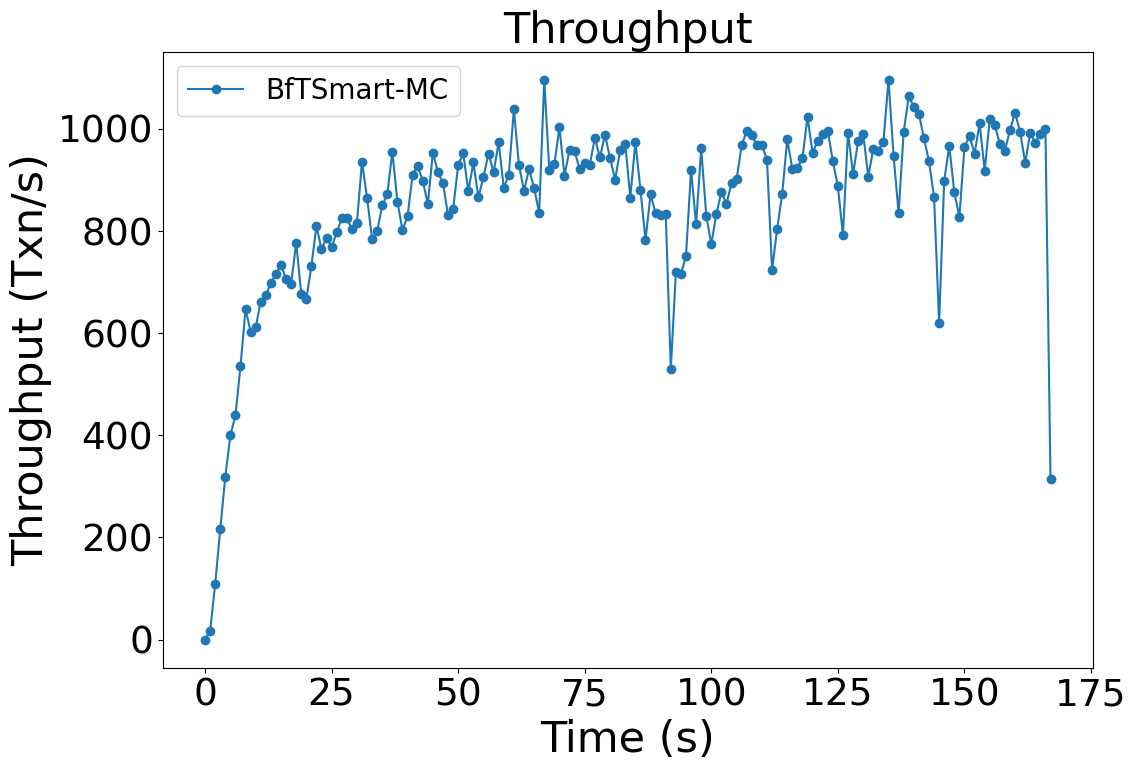

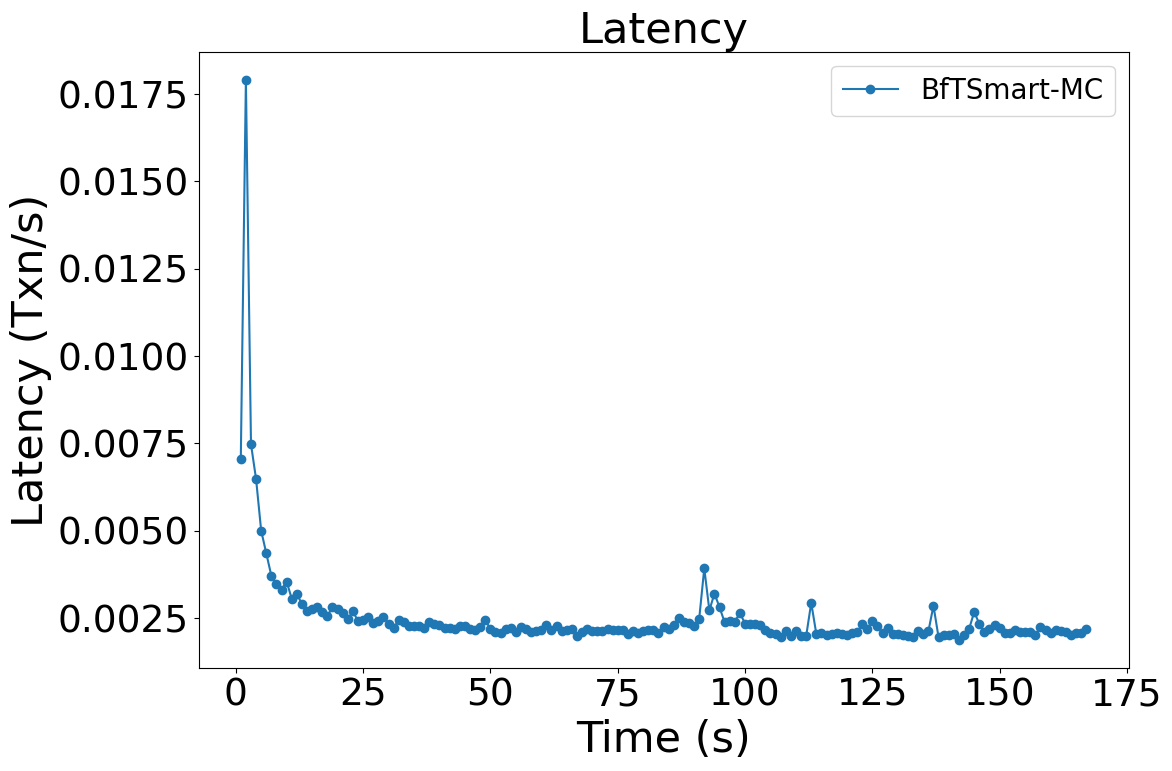

ERROR: gcloud crashed (ConnectionError): ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

If you would like to report this issue, please run the following command:
  gcloud feedback

To check gcloud for common problems, please run the following command:
  gcloud info --run-diagnostics


In [10]:
if 2 > 1:
    if 2 >1:
        

        check_node(7)

        results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [7,8,9])


        print('XXXXXXXX Started Clients XXXXXXXXXXXX')

        results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))

#         time.sleep(5)

        time.sleep(80)
        results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in [7])
        time.sleep(20)
        results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in [8])
        time.sleep(20)
        results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in [9])
        
        time.sleep(80)

        results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

        check_node(0)

        if not os.path.exists('../Experiments/'+experiment):
            os.mkdir('../Experiments/'+experiment)

        os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')



        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 


            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

                os.system(command)

                break;



        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 



            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
                print('client copying id= ',i)
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
                print(command)
                os.system(command)


        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 


            print(i)
            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
                print('client copying id= ',i)


        node_info_dict

        clientIps




        def getTimesThputs(file):
            f = open(file, "r")
            data = f.readlines() 
            times = []
            thputs = []
            latencies = []
            for line in data:
        #         print(line)
                if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

        #         print(line)
                    times.append(line.split('sec:')[0].strip())
                    thputs.append(line.split(';')[1].split('current')[0].strip())
                
                
                    read_lat = '0'
                    write_lat = '0'
                    
                    if ('READ AverageLatency' in line):
                        
                        print(line)

                        read_lat = line.split('READ AverageLatency(us)=')[1].split(']')[0].strip()
                        
                        
                    if ('UPDATE AverageLatency' in line):                    
                        
                        write_lat = line.split('UPDATE AverageLatency(us)=')[1].split(']')[0].strip()


                    if (('READ AverageLatency' not in line) and ('UPDATE AverageLatency' not in line)):
                        latencies.append(line.split('=')[1].split(']')[0].strip())
                    else:
                        read_frac = 0
                        write_frac = 0
                        
                        if float(read_lat) > 0:
                            read_frac = 0.85
                            
                        if float(write_lat) > 0:
                            write_frac = 0.15
                            
#                         print(line, write_frac, read_frac, float(read_lat), float(write_lat))
                        
                        lat = str( (write_frac * float(write_lat) +\
                                    read_frac*float(read_lat))/(write_frac+read_frac)\
                                 )
                        latencies.append(lat)

                    print(line,latencies[-1],thputs[-1],times[-1])

            return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  


        times_thputsDict = {}
        times_latsDict = {}


        for ip in clientIps[:1]:    
            i = clientIps.index(ip)

            times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')

            print(times, thputs)
            for i in range(len(times)):
                times_thputsDict[times[i]] = thputs[i]
                times_latsDict[times[i]] = lats[i]


        for ip in clientIps[1:]:    
            i = clientIps.index(ip)

            times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')


            for i in range(len(times)):

                if times[i] in times_thputsDict.keys():
                    times_thputsDict[times[i]] += thputs[i]

                if times[i] in times_latsDict.keys():
                    times_latsDict[times[i]] += lats[i]


        times_thputsDict



        PIK = '../Experiments/'+experiment+"/pickle.dat"

        data = [times_thputsDict, times_latsDict]

        with open(PIK, "wb") as f:
            pickle.dump(data, f)

        experiment

        # experiment = 'TestRun2_8_clusters_2'
        # PIK = '../Experiments/'+experiment+"/pickle.dat"

        data2 = []
        
        with open(PIK, "rb") as f:
            data2 =  pickle.load(f)


        dict1 = data2[0]
        dict2 = data2[1]



        times1 = np.array(list(dict1.keys()))
        thputs = np.array(list(dict1.values()))

        times2 = np.array(list(dict2.keys()))
        lats = np.array(list(dict2.values()))

        

        

        times_new = [x for x in range(1+int(times1[-1]))]
        thputs_new = [0 for x in range(1+int(times1[-1]))]

        for idx, t in enumerate(times1):
            thputs_new[int(t)] = thputs[idx]
            
            
            

        SMALL_SIZE = 27
        MEDIUM_SIZE = 31
        BIGGER_SIZE = 22

        pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
        pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        pl.rc('legend', fontsize=20)    # legend fontsize
        pl.rc('figure', titlesize=BIGGER_SIZE) 



    

        pl.figure(figsize = (12,8))
        pl.rcParams.update({'font.size': 17})
        pl.plot(times_new[:], thputs_new[:], '-o', label='BfTSmart-MC')


        pl.title(r'Throughput')


        pl.xlabel('Time (s)')
        pl.ylabel('Throughput (Txn/s)')
        pl.legend()
        pl.savefig('../Experiments/'+experiment+'/out1.png', dpi = 150)
        pl.show()




        pl.figure(figsize = (12,8))
        pl.rcParams.update({'font.size': 17})
        pl.plot(times1[:], lats[:]/ len(clientIps), '-o', label='BfTSmart-MC')


        pl.title(r'Latency')


        pl.xlabel('Time (s)')
        pl.ylabel('Latency (Txn/s)')
        pl.legend()
        pl.savefig('../Experiments/'+experiment+'/out2.png', dpi = 150)
        pl.show()

        times1, lats

        lats, np.average(lats[-85:-5])/len(clientIps)

        np.sum(thputs),  np.average(thputs[-85:-5])

        thputs

        np.average(thputs[60:80]), np.average(lats[60:80])/nclusters, np.average(thputs[-35:-5]), np.average(lats[-35:-5])

        # np.average(lats[-50:]), np.average(thputs[-50:]) # (0.0542783668, 166.87759999999997)

        np.sum((thputs[:180]))

        np.sum((thputs[:180]))
        
        
        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 


            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0 and i in [7,8,9]:
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

                os.system(command)

#                 break;




#         os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')

#     except:
#         os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')
#         continue
    

In [14]:
data = np.array([times_new,thputs_new])
np.savetxt('../Experiments/bft_mc_join/data.txt', data)

In [ ]:
for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 


    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0 :
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

        os.system(command)

In [ ]:
len(lines)

In [ ]:

def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())


            read_lat = '0'
            write_lat = '0'

            if ('READ AverageLatency' in line):

                print(line)

                read_lat = line.split('READ AverageLatency(us)=')[1].split(']')[0].strip()


            if ('UPDATE AverageLatency' in line):                    

                write_lat = line.split('UPDATE AverageLatency(us)=')[1].split(']')[0].strip()


            if (('READ AverageLatency' not in line) and ('UPDATE AverageLatency' not in line)):
                latencies.append(line.split('=')[1].split(']')[0].strip())
            else:
                read_frac = 0
                write_frac = 0

                if float(read_lat) > 0:
                    read_frac = 0.85

                if float(write_lat) > 0:
                    write_frac = 0.15

#                         print(line, write_frac, read_frac, float(read_lat), float(write_lat))

                lat = str( (write_frac * float(write_lat) +\
                            read_frac*float(read_lat))/(write_frac+read_frac)\
                         )
                latencies.append(lat)

            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  


times_thputsDict = {}
times_latsDict = {}


for ip in clientIps[:1]:    
    i = clientIps.index(ip)

    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')

    print(times, thputs)
    for i in range(len(times)):
        times_thputsDict[times[i]] = thputs[i]
        times_latsDict[times[i]] = lats[i]


for ip in clientIps[1:]:    
    i = clientIps.index(ip)

    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')


    for i in range(len(times)):

        if times[i] in times_thputsDict.keys():
            times_thputsDict[times[i]] += thputs[i]

        if times[i] in times_latsDict.keys():
            times_latsDict[times[i]] += lats[i]


times_thputsDict



PIK = '../Experiments/'+experiment+"/pickle.dat"

data = [times_thputsDict, times_latsDict]

with open(PIK, "wb") as f:
    pickle.dump(data, f)

experiment

# experiment = 'TestRun2_8_clusters_2'
# PIK = '../Experiments/'+experiment+"/pickle.dat"

data2 = []

with open(PIK, "rb") as f:
    data2 =  pickle.load(f)


dict1 = data2[0]
dict2 = data2[1]



times1 = np.array(list(dict1.keys()))
thputs = np.array(list(dict1.values()))

times2 = np.array(list(dict2.keys()))
lats = np.array(list(dict2.values()))





times_new = [x for x in range(1+int(times1[-1]))]
thputs_new = [0 for x in range(1+int(times1[-1]))]

for idx, t in enumerate(times1):
    thputs_new[int(t)] = thputs[idx]




from itertools import cycle
cycol = cycle('bgrcmk')


SMALL_SIZE = 27
MEDIUM_SIZE = 31
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=20)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 


pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times_new[:], thputs_new[:], '-o', label='BfTSmart-MC')

pl.axvline(x = 80, color = next(cycol), linestyle='--', label = 'join: 1')
pl.axvline(x = 100, color = next(cycol), linestyle='--', label = 'join: 2')
pl.axvline(x = 120, color = next(cycol), linestyle='--', label = 'join: 3')

pl.title(r'Throughput')


pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/join_bft.pdf', dpi = 150, bbox_inches='tight')
pl.show()



In [ ]:
# import os
# os.system('git add .; git commit -m "Working with modified ClusterInfo";git push --force origin')


In [ ]:
len(times1)

In [ ]:
np.average(lats)/nclusters

In [ ]:
np.average(thputs[60:80])

In [ ]:
n_clusters